In [1]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import mean_squared_error
import numpy as np
import matplotlib.pyplot as plt

/var/folders/3t/_b6g8knj39g9p92hxh64xcfc0000gn/T/ipykernel_7804/2013676888.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
training_data_path = 'HW7_Pr1_S24_training_data.csv'
training_data = pd.read_csv(training_data_path)
testing_data_path = 'HW7_Pr1_S24_test_data.csv'
testing_data = pd.read_csv(testing_data_path)

X_train = training_data.iloc[:, :-1]
y_train = training_data.iloc[:, -1]
X_test = testing_data.iloc[:, :-1]
y_test = testing_data.iloc[:, -1]

In [3]:
linear_model = LinearRegression()

kf = KFold(n_splits=5, shuffle=True, random_state=1)

rmse_scores = []

for train_index, test_index in kf.split(X_train):
    X_train_cv, X_test_cv = X_train.iloc[train_index], X_train.iloc[test_index]
    y_train_cv, y_test_cv = y_train.iloc[train_index], y_train.iloc[test_index]
    
    linear_model.fit(X_train_cv, y_train_cv)
    
    y_pred_cv = linear_model.predict(X_test_cv)
    
    rmse = np.sqrt(mean_squared_error(y_test_cv, y_pred_cv))
    rmse_scores.append(rmse)

average_rmse = np.mean(rmse_scores)
std_deviation_rmse = np.std(rmse_scores)

average_rmse, std_deviation_rmse, rmse_scores

(2.4224050579446947,
 0.1025826542654476,
 [2.408284906434287,
  2.2635356962512905,
  2.585704379382519,
  2.4424740450334634,
  2.412026262621913])

In [4]:
from sklearn.cluster import KMeans
from sklearn.metrics.pairwise import euclidean_distances

In [5]:
kf1 = KFold(n_splits=5, shuffle=False)

def rbf_kernel(X, centers, gamma):
    pairwise_sq_dists = euclidean_distances(X, centers, squared=True)
    return np.exp(-gamma * pairwise_sq_dists)

M = train_index.shape[0]
gamma_d = M/32
gamma_values = np.logspace(np.log10(0.01 * gamma_d), np.log10(100 * gamma_d), num=5)

avg_train_rmse_list = []
avg_val_rmse_list = []
std_val_rmse_list = []

for gamma in gamma_values:
    train_rmse = []
    val_rmse = []
    
    for train_index, test_index in kf1.split(X_train):
        X_train_cv, X_val_cv = X_train.iloc[train_index], X_train.iloc[test_index]
        y_train_cv, y_val_cv = y_train.iloc[train_index], y_train.iloc[test_index]
        
        # Transform training and validation data
        X_train_rbf = rbf_kernel(X_train_cv, X_train_cv, gamma)
        X_val_rbf = rbf_kernel(X_val_cv, X_train_cv, gamma)
        
        # Fit the model and predict
        linear_model.fit(X_train_rbf, y_train_cv)
        y_train_pred = linear_model.predict(X_train_rbf)
        y_val_pred = linear_model.predict(X_val_rbf)
        
        # Calculate and store RMSE
        train_rmse.append(np.sqrt(mean_squared_error(y_train_cv, y_train_pred)))
        val_rmse.append(np.sqrt(mean_squared_error(y_val_cv, y_val_pred)))
    
    avg_train_rmse = np.mean(train_rmse)
    avg_val_rmse = np.mean(val_rmse)
    std_dev_val_rmse = np.std(val_rmse)
    
    avg_train_rmse_list.append(avg_train_rmse)
    avg_val_rmse_list.append(avg_val_rmse)
    std_val_rmse_list.append(std_dev_val_rmse)

    # Print RMSE results for the current gamma
    print(f"Gamma: {gamma}")
    print(f"Training RMSE for each fold: {train_rmse}")
    print(f"Validation RMSE for each fold: {val_rmse}")
    print(f"Average Training RMSE: {avg_train_rmse}")
    print(f"Average Validation RMSE: {avg_val_rmse}")
    print(f"Standard Deviation of Validation RMSE: {std_dev_val_rmse}")
    print('----------------------------------')

# After loop ends, find the best gamma value
best_gamma_index = np.argmin(avg_val_rmse_list)
best_gamma = gamma_values[best_gamma_index]
best_rmse = avg_val_rmse_list[best_gamma_index]
best_std_dev = std_val_rmse_list[best_gamma_index]

# Print the best gamma and corresponding RMSE statistics
print(f"Best Gamma: {best_gamma}")
print(f"Lowest Validation RMSE: {best_rmse}")
print(f"Standard Deviation of Validation RMSE at Best Gamma: {best_std_dev}")


Gamma: 0.25
Training RMSE for each fold: [0.21461735438300553, 0.23029767961039097, 0.23642605969901018, 0.21529778139318123, 0.22850034435844363]
Validation RMSE for each fold: [0.3267145709619058, 0.3649195339589948, 0.2507341142553919, 0.526653616308902, 0.49497760873986774]
Average Training RMSE: 0.2250278438888063
Average Validation RMSE: 0.3927998888450125
Standard Deviation of Validation RMSE: 0.1036188926180155
----------------------------------
Gamma: 2.5
Training RMSE for each fold: [0.08869132661219349, 0.08923701272616874, 0.09237078452926487, 0.09044657020902257, 0.08827011514767487]
Validation RMSE for each fold: [0.5145967309874633, 0.18340740029718622, 0.13229961419738578, 2.226506751859596, 0.4882592058492899]
Average Training RMSE: 0.0898031618448649
Average Validation RMSE: 0.7090139406381842
Standard Deviation of Validation RMSE: 0.7743612575561934
----------------------------------
Gamma: 24.999999999999993
Training RMSE for each fold: [0.04252104389274419, 0.03996

In [6]:
gamma_values

array([2.5e-01, 2.5e+00, 2.5e+01, 2.5e+02, 2.5e+03])

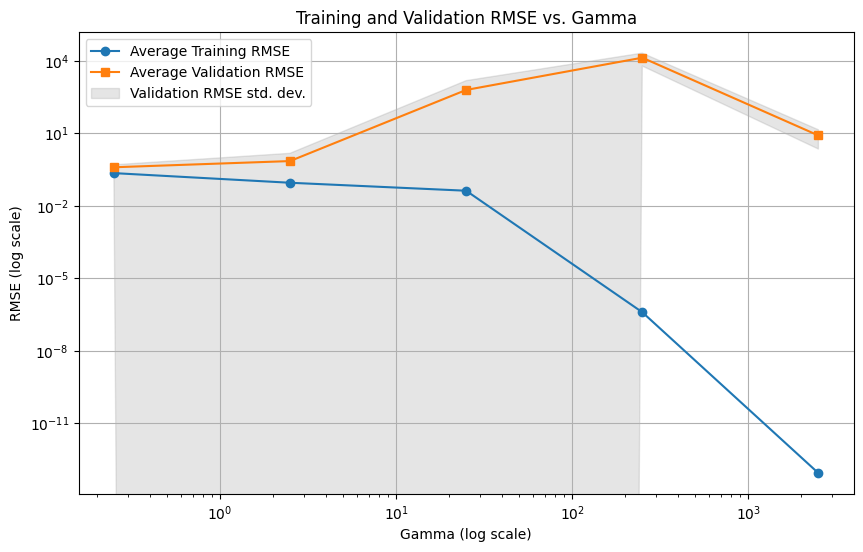

In [7]:
plt.figure(figsize=(10, 6))
plt.plot(gamma_values, avg_train_rmse_list, marker='o', label='Average Training RMSE')
plt.plot(gamma_values, avg_val_rmse_list, marker='s', label='Average Validation RMSE')
plt.fill_between(gamma_values, 
                 np.array(avg_val_rmse_list) - np.array(std_val_rmse_list),
                 np.array(avg_val_rmse_list) + np.array(std_val_rmse_list),
                 color='gray', alpha=0.2, label='Validation RMSE std. dev.')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Gamma (log scale)')
plt.ylabel('RMSE (log scale)')
plt.title('Training and Validation RMSE vs. Gamma')
plt.legend()
plt.grid(True)
plt.show()

In [8]:
K_values=range(10, 101, 10)
Log_value = [0.01, 0.1, 1, 10, 100]

avg_train_rmse_per_gamma = {k: [] for k in K_values}
avg_val_rmse_per_gamma = {k: [] for k in K_values}
std_dev_val_rmse_per_gamma = {k: [] for k in K_values}
std_dev_train_rmse_per_gamma = {k: [] for k in K_values}

best_rmse_overall = float('inf')
best_gamma_overall = None
best_K_overall = None

# Loop over K values
for K in K_values:
    best_rmse_for_current_K = float('inf')
    best_gamma_for_current_K = None

    # Run KMeans clustering
    kmeans = KMeans(n_clusters=K, init='random', n_init=10)
    kmeans.fit(X_train)
    centers = kmeans.cluster_centers_

    # Loop over gamma values
    for gamma in Log_value:
        gamma_d = K / 32
        gamma_values2 = gamma_d * gamma
        # KFold cross-validation
        kf2 = KFold(n_splits=5, shuffle=False)
        train_rmse_scores = []
        val_rmse_scores = []

        for train_index, test_index in kf2.split(X_train):
            # Transform the data using the RBF kernel
            X_train_rbf = rbf_kernel(X_train.iloc[train_index], centers, gamma_values2)
            X_val_rbf = rbf_kernel(X_train.iloc[test_index], centers, gamma_values2)

            # Train the model and calculate RMSE
            model = LinearRegression()
            model.fit(X_train_rbf, y_train.iloc[train_index])
            y_val_pred = model.predict(X_val_rbf)

            train_rmse = np.sqrt(mean_squared_error(y_train.iloc[train_index], model.predict(X_train_rbf)))
            val_rmse = np.sqrt(mean_squared_error(y_train.iloc[test_index], y_val_pred))
        
            train_rmse_scores.append(train_rmse)
            val_rmse_scores.append(val_rmse)

        # Calculate the average and standard deviation of RMSE for the current gamma
        avg_train_rmse = np.mean(train_rmse_scores)
        std_train_rmse = np.std(train_rmse_scores)
        avg_val_rmse = np.mean(val_rmse_scores)
        std_dev_rmse = np.std(val_rmse_scores)

        # Store the RMSEs for plotting
        avg_train_rmse_per_gamma[K].append(avg_train_rmse)
        std_dev_train_rmse_per_gamma[K].append(std_train_rmse)
        avg_val_rmse_per_gamma[K].append(avg_val_rmse)
        std_dev_val_rmse_per_gamma[K].append(std_dev_rmse)

        # Update the best gamma for the current K if necessary
        if avg_val_rmse < best_rmse_for_current_K:
            best_rmse_for_current_K = avg_val_rmse
            best_gamma_for_current_K = gamma_values2

    # If the current K produced the best RMSE, update the overall best values
    if best_rmse_for_current_K < best_rmse_overall:
        best_rmse_overall = best_rmse_for_current_K
        best_gamma_overall = best_gamma_for_current_K
        best_K_overall = K


In [9]:
print("Best K: ", best_K_overall)
print("Best Gamma: ", best_gamma_overall)

# Calculate gamma_plus
gamma_plus = 0.01 * best_gamma_overall
print("Gamma Plus (γ+): ", gamma_plus)

# Calculate the average and standard deviation of RMSE on the validation sets for the best parameters
avg_val_rmse_best = np.mean(avg_val_rmse_per_gamma[best_K_overall])
std_dev_val_rmse_best = np.mean(std_dev_val_rmse_per_gamma[best_K_overall])
print("Cross-validation Average RMSE (Validation set): ", avg_val_rmse_best)
print("Standard Deviation of RMSE (Validation set): ", std_dev_val_rmse_best)

Best K:  100
Best Gamma:  3.125
Gamma Plus (γ+):  0.03125
Cross-validation Average RMSE (Validation set):  0.8064402802465847
Standard Deviation of RMSE (Validation set):  0.1565994151501542


In [10]:
print(f"Best Gamma: {best_gamma_overall}")
print(f"Best K: {best_K_overall}")
print(f"Best Validation RMSE: {best_rmse_overall}")

Best Gamma: 3.125
Best K: 100
Best Validation RMSE: 0.15343502467518086


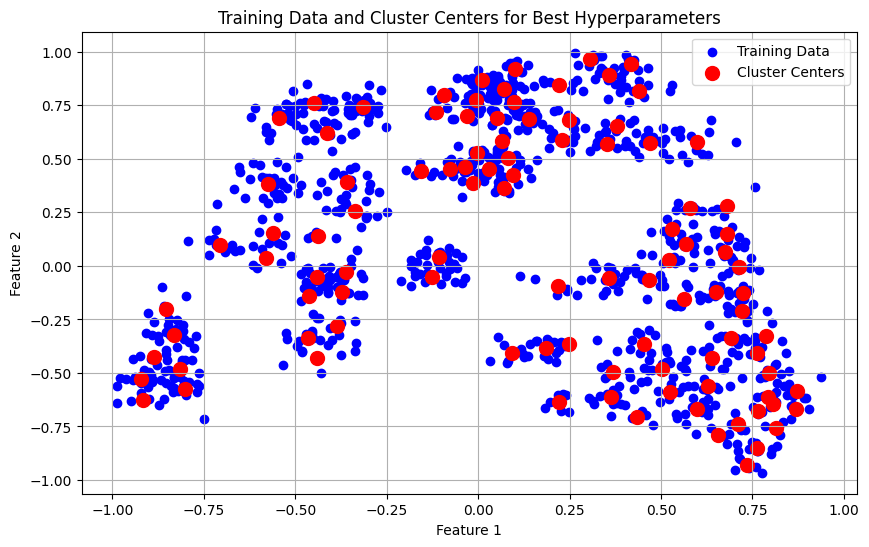

In [11]:
# Assuming the best centers are accessible like this
best_centers = kmeans.cluster_centers_  # Modify as necessary to get the right centers

plt.figure(figsize=(10, 6))
if isinstance(X_train, np.ndarray):
    plt.scatter(X_train[:, 0], X_train[:, 1], color='blue', label='Training Data')
else:  # Assuming DataFrame
    plt.scatter(X_train.iloc[:, 0], X_train.iloc[:, 1], color='blue', label='Training Data')
plt.scatter(best_centers[:, 0], best_centers[:, 1], color='red', s=100, label='Cluster Centers')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Training Data and Cluster Centers for Best Hyperparameters')
plt.legend()
plt.grid(True)
plt.show()


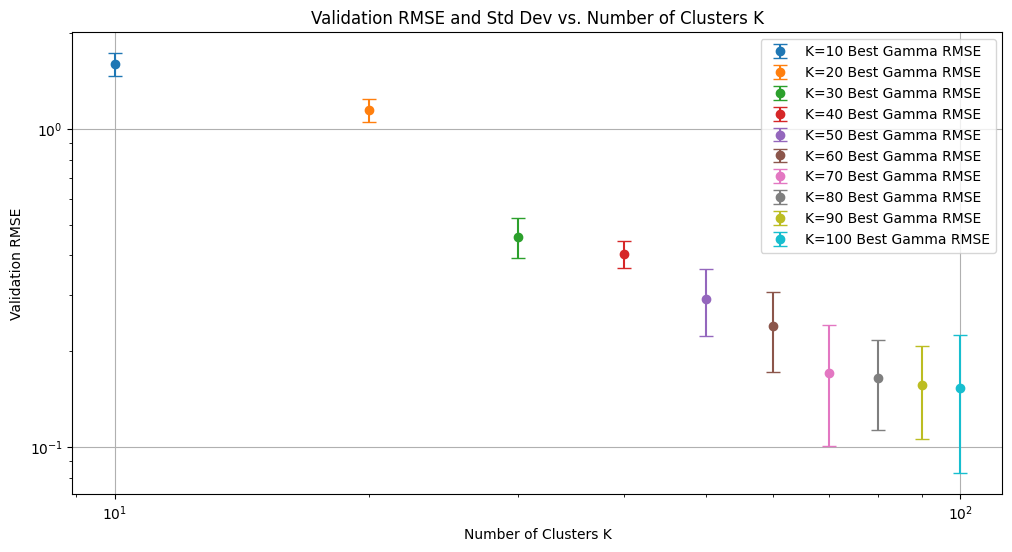

In [12]:
plt.figure(figsize=(12, 6))
for K in K_values:
    best_index = np.argmin(avg_val_rmse_per_gamma[K])  # Index of the best gamma for each K
    best_rmse = avg_val_rmse_per_gamma[K][best_index]
    best_std = std_dev_val_rmse_per_gamma[K][best_index]
    plt.errorbar(K, best_rmse, yerr=best_std, fmt='o', capsize=5, label=f'K={K} Best Gamma RMSE')

plt.xlabel('Number of Clusters K')
plt.ylabel('Validation RMSE')
plt.title('Validation RMSE and Std Dev vs. Number of Clusters K')
plt.xscale('log')
plt.yscale('log')
plt.legend()
plt.grid(True)
plt.show()

In [13]:
best_K = best_K_overall
calculated_gammas_for_best_K = [(best_K / 32) * gamma for gamma in Log_value]  # Log_value contains the multipliers [0.01, 0.1, 1, 10, 100]

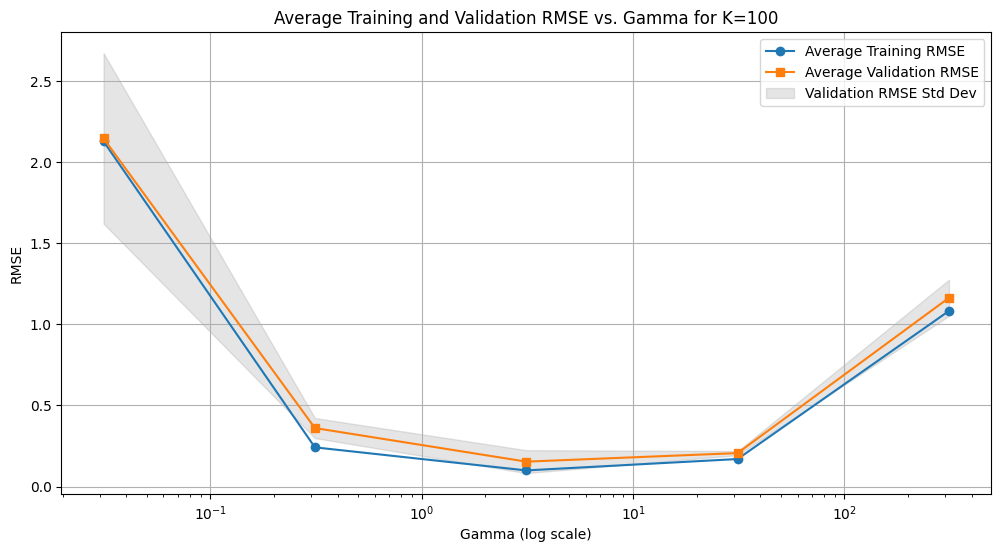

In [14]:
import matplotlib.pyplot as plt

# Now plot
plt.figure(figsize=(12, 6))
plt.plot(calculated_gammas_for_best_K, avg_train_rmse_per_gamma[best_K], label='Average Training RMSE', marker='o')
plt.plot(calculated_gammas_for_best_K, avg_val_rmse_per_gamma[best_K], label='Average Validation RMSE', marker='s')
plt.fill_between(calculated_gammas_for_best_K, 
                 np.array(avg_val_rmse_per_gamma[best_K]) - np.array(std_dev_val_rmse_per_gamma[best_K]),
                 np.array(avg_val_rmse_per_gamma[best_K]) + np.array(std_dev_val_rmse_per_gamma[best_K]),
                 color='gray', alpha=0.2, label='Validation RMSE Std Dev')
plt.xscale('log')
plt.xlabel('Gamma (log scale)')
plt.ylabel('RMSE')
plt.title(f'Average Training and Validation RMSE vs. Gamma for K={best_K}')
plt.legend()
plt.grid(True)
plt.show()


In [15]:
linear_model.fit(X_train, y_train)

y_pred_test_b = linear_model.predict(X_test)
rmse_test_b = np.sqrt(mean_squared_error(y_test, y_pred_test_b))

print(f"Test RMSE for the linear regression model (part b): {rmse_test_b}")


Test RMSE for the linear regression model (part b): 2.5202031892169177


In [16]:
X_train_rbf_c = rbf_kernel(X_train, X_train, best_gamma)
X_test_rbf_c = rbf_kernel(X_test, X_train, best_gamma) 

linear_model.fit(X_train_rbf_c, y_train)

y_pred_test_c = linear_model.predict(X_test_rbf_c)
rmse_test_c = np.sqrt(mean_squared_error(y_test, y_pred_test_c))

print(f"Test RMSE for the RBF network model (part c) with gamma = {best_gamma}: {rmse_test_c}")


Test RMSE for the RBF network model (part c) with gamma = 0.25: 0.33750126121722096


In [18]:
kmeans = KMeans(n_clusters=100, init='random', n_init=10)
kmeans.fit(X_train)
centers = kmeans.cluster_centers_

In [19]:
X_train_rbf = rbf_kernel(X_train, centers, 3.125)
X_test_rbf = rbf_kernel(X_test, centers, 3.125)

linear_model.fit(X_train_rbf, y_train)

y_pred_test = linear_model.predict(X_test_rbf)
test_rmse = np.sqrt(mean_squared_error(y_test, y_pred_test))
print(f"Test RMSE for the RBF network (part d)= {3.125}: {test_rmse}")

Test RMSE for the RBF network (part d)= 3.125: 0.05976979422103121
